<a href="https://colab.research.google.com/github/jimin-kim-hub/-/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [9]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [10]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [11]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [12]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    # Convolutional layer. Learn 64 filters using a 3x3 kernel

    tf.keras.layers.Conv2D(
        64, (3, 3), activation="relu", input_shape=(32, 32, 3)
    ),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
    tf.keras.layers.BatchNormalization(),
    # Convolutional layer. Learn 128 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.35),

    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation="relu"),
    tf.keras.layers.BatchNormalization(),
    # Convolutional layer. Learn 246 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    # Flatten units
    tf.keras.layers.Flatten(),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add an output layer with output units for all 10 digits
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile and Train neural network

In [13]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.3069 - loss: 1.9971
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5276 - loss: 1.3463
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6088 - loss: 1.1553
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6429 - loss: 1.0599
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6746 - loss: 0.9766
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7009 - loss: 0.9153
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7153 - loss: 0.8735
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7342 - loss: 0.8095
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7463 - loss: 0.7891
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7583 - loss: 0.7540


## Evaluate neural network performance


In [14]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - 9ms/step - accuracy: 0.7642 - loss: 0.7674


[0.7673905491828918, 0.76419997215271]

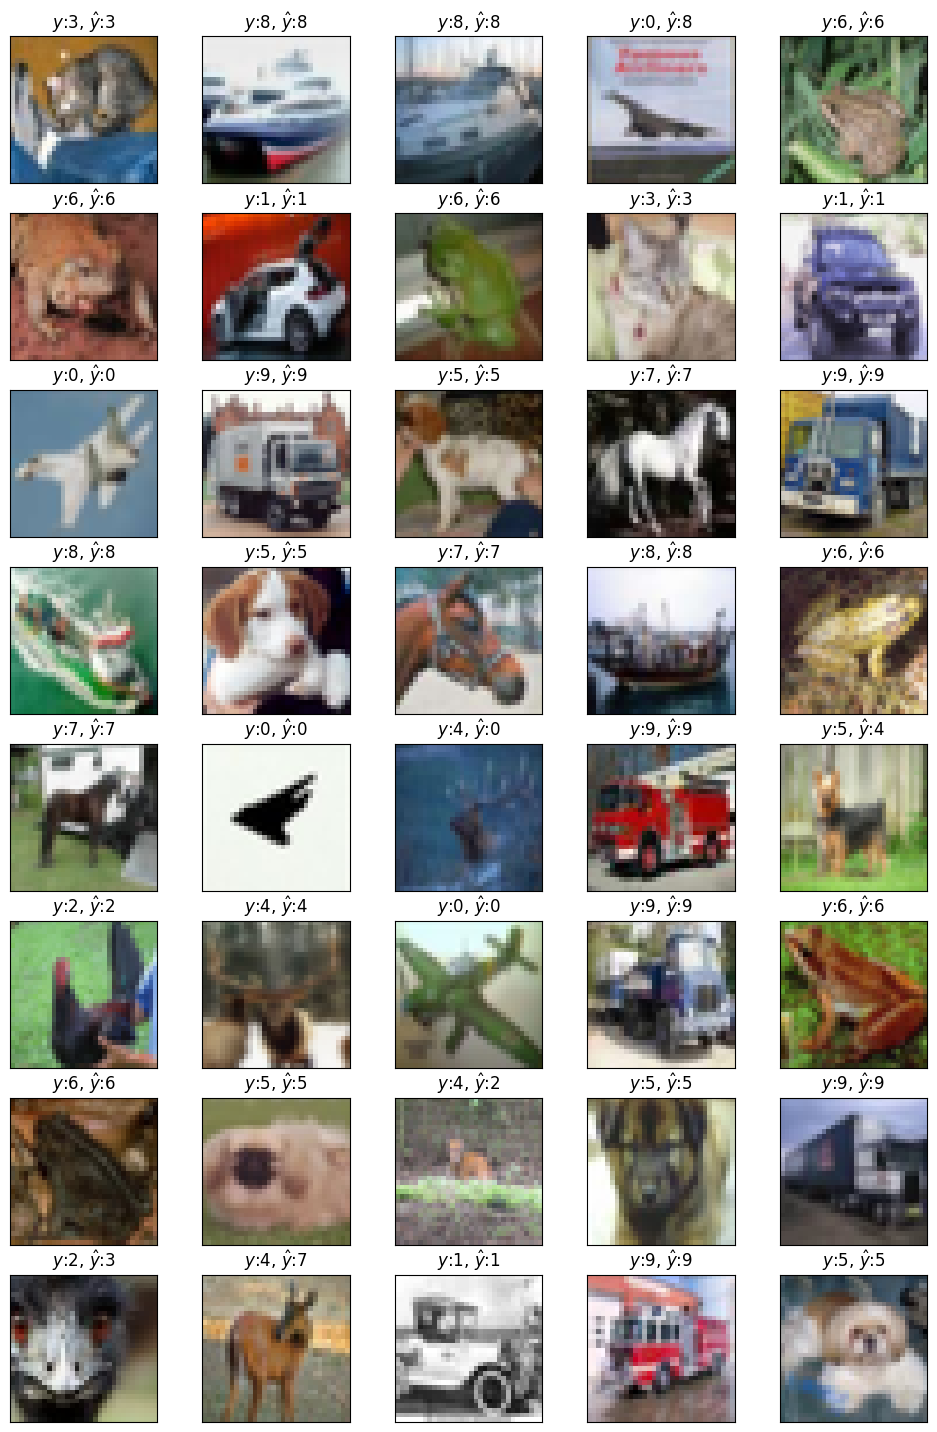

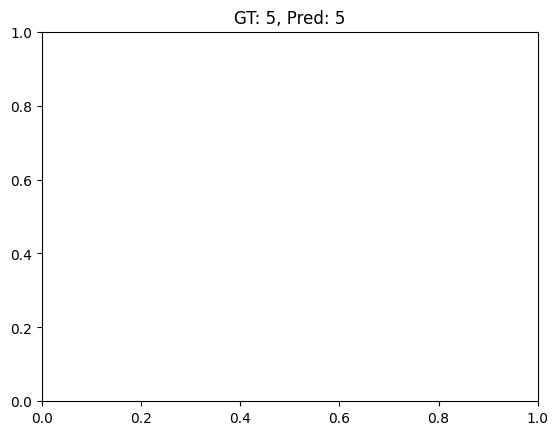

In [15]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [16]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.76419997215271
